# K-Means
# 1. Calculate Distance
# 2. Mean Shifting
# 3. Input Vectors (columns) should be in same direction
# 4. Input data should be in same range
# 5. Do not put Categorial varibable as it calculates Eucludiean distance



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [104]:
import os

print(os.getcwd())

C:\Users\Ankitude\PracticeProjects\Untitled Folder


In [105]:
df=pd.read_csv("rfm.csv")
df.head()

,CustomerID,Recency,Monetry,Frequency
0,12346,3235,77183.60,1
1,12347,2911,4310.00,7
2,12348,2985,1797.24,4
3,12349,2928,1757.55,1
4,12350,3219,334.40,1


In [106]:
#Recency 1:5 (5 is best and 1 is worst)
df.Recency

0       3235
1       2911
2       2985
3       2928
4       3219
        ... 
4334    3187
4335    3090
4336    2917
4337    2913
4338    2952
Name: Recency, Length: 4339, dtype: int64

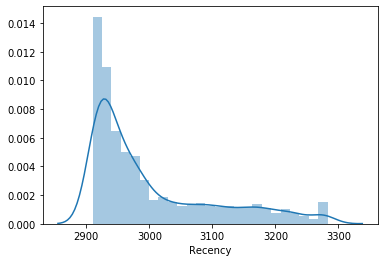

In [107]:
sns.distplot(df.Recency)

In [108]:
df.Recency.quantile(0.2)

2922.6000000000004

In [109]:
recency_20th=df.Recency.quantile(0.2)
recency_40th=df.Recency.quantile(0.4)
recency_60th=df.Recency.quantile(0.6)
recency_80th=df.Recency.quantile(0.8)

def recency_score(x):
    if x<recency_20th:
        return 5
    elif x<recency_40th:
        return 4
    elif x<recency_60th:
        return 3
    elif x<recency_80th:
        return 2
    else:
        return 1
    

In [110]:
df["R_score"]=df.Recency.map(lambda x:recency_score(x))
df["R_score"]

0       1
1       5
2       2
3       4
4       1
       ..
4334    1
4335    1
4336    5
4337    5
4338    3
Name: R_score, Length: 4339, dtype: int64

In [111]:
Frequency_20th=df.Frequency.quantile(0.2)
Frequency_40th=df.Frequency.quantile(0.4)
Frequency_60th=df.Frequency.quantile(0.6)
Frequency_80th=df.Frequency.quantile(0.8)

def Frequency_score(x):
    if x<Frequency_20th:
        return 1
    elif x<Frequency_40th:
        return 2
    elif x<Frequency_60th:
        return 3
    elif x<Frequency_80th:
        return 4
    else:
        return 5

In [112]:
df["F_score"]=df.Frequency.map(lambda x: Frequency_score(x))
df["F_score"]

0       2
1       5
2       4
3       2
4       2
       ..
4334    2
4335    2
4336    3
4337    5
4338    4
Name: F_score, Length: 4339, dtype: int64

In [113]:
Monetry_20th=df.Monetry.quantile(0.2)
Monetry_40th=df.Monetry.quantile(0.4)
Monetry_60th=df.Monetry.quantile(0.6)
Monetry_80th=df.Monetry.quantile(0.8)

def Monetry_score(x):
    if x<Monetry_20th:
        return 1
    elif x<Monetry_40th:
        return 2
    elif x<Monetry_60th:
        return 3
    elif x<Monetry_80th:
        return 4
    else:
        return 5

In [114]:
df["M_score"]=df.Monetry.map(lambda x: Monetry_score(x))
df["M_score"]


0       5
1       5
2       4
3       4
4       2
       ..
4334    1
4335    1
4336    1
4337    5
4338    4
Name: M_score, Length: 4339, dtype: int64

In [115]:
df

,CustomerID,Recency,Monetry,Frequency,R_score,F_score,M_score
0,12346,3235,77183.60,1,1,2,5
1,12347,2911,4310.00,7,5,5,5
2,12348,2985,1797.24,4,2,4,4
3,12349,2928,1757.55,1,4,2,4
4,12350,3219,334.40,1,1,2,2
...,...,...,...,...,...,...,...
4334,18280,3187,180.60,1,1,2,1
4335,18281,3090,80.82,1,1,2,1
4336,18282,2917,178.05,2,5,3,1
4337,18283,2913,2094.88,16,5,5,5


In [116]:
X=df[["R_score","F_score","M_score"]].copy()

In [117]:
from sklearn.cluster import KMeans
cls=KMeans(n_clusters=4,random_state=22)
cls.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [118]:
print(X.columns)
cls.cluster_centers_

Index(['R_score', 'F_score', 'M_score'], dtype='object')


array([[4.36951833, 4.53774263, 4.41337168],
       [1.36657682, 2.20485175, 1.61814915],
       [3.78156997, 2.5039818 , 1.83503982],
       [2.16841004, 3.59623431, 3.62343096]])

In [120]:
df["label"]=cls.predict(X)
df

,CustomerID,Recency,Monetry,Frequency,R_score,F_score,M_score,label
0,12346,3235,77183.60,1,1,2,5,3
1,12347,2911,4310.00,7,5,5,5,0
2,12348,2985,1797.24,4,2,4,4,3
3,12349,2928,1757.55,1,4,2,4,2
4,12350,3219,334.40,1,1,2,2,1
...,...,...,...,...,...,...,...,...
4334,18280,3187,180.60,1,1,2,1,1
4335,18281,3090,80.82,1,1,2,1,1
4336,18282,2917,178.05,2,5,3,1,2
4337,18283,2913,2094.88,16,5,5,5,0


C:\Anaconda2\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda2\envs\py36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


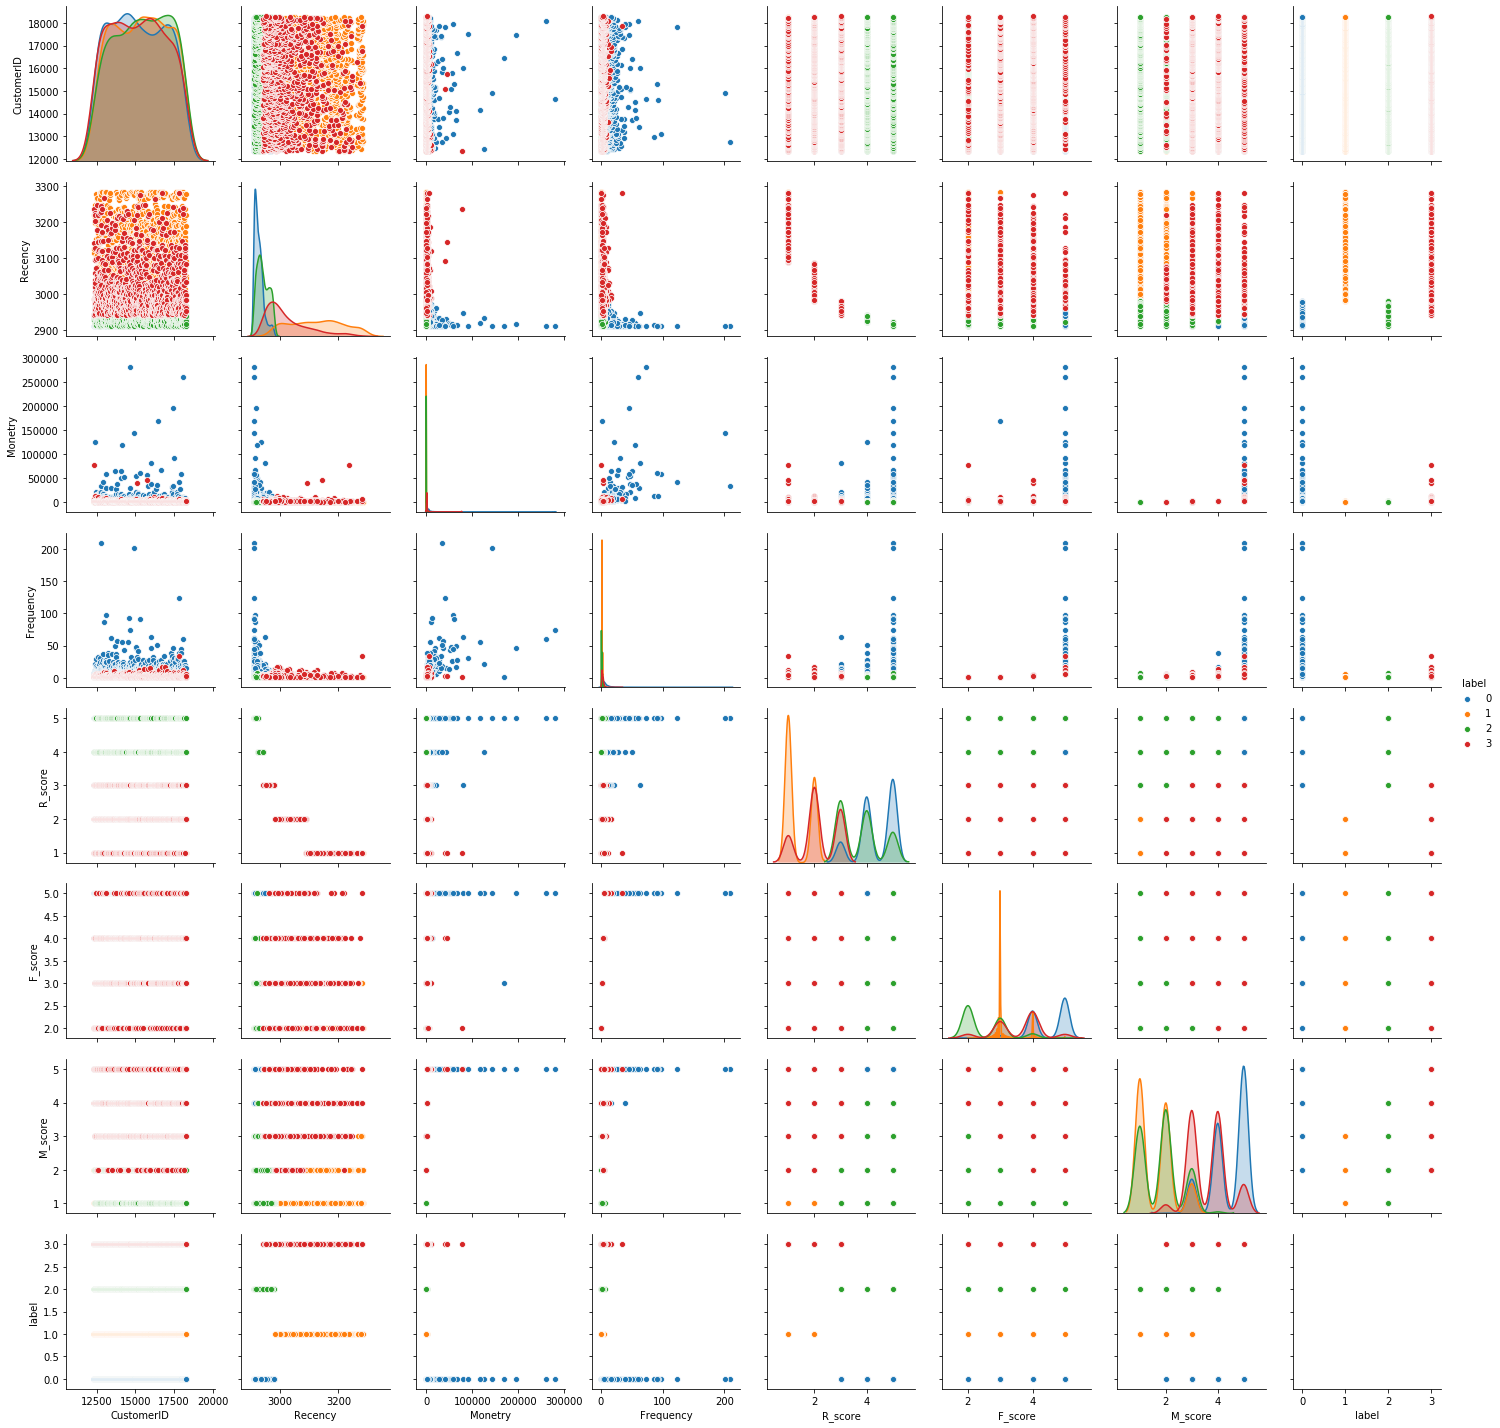

In [121]:
sns.pairplot(df,hue='label')